## Performance of SMA strategy implemented daily (buy when 50-day SMA > 200-day SMA, sell when opposite)

In [1]:
from preprocess import prep_all_movavg, prep_movavg_mod
from tradesim_sma import simulate as sim_alt
from tradesim_sma_daily import simulate, sim_buy_hold_eq
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_xlvtick = pd.read_csv('XLV.csv')
tick_list = df_xlvtick['Ticker'].tolist()
df_dict = prep_movavg_mod(tick_list)
start = pd.to_datetime('12/22/98')
end = pd.to_datetime('01/06/21')
funds = 1000000

In [67]:
funds = 1000000

In [3]:
sma_funds, sma_current_val, sma_fund_df = simulate(funds, df_dict, start, end)

In [69]:
funds, current_val, fund_df = sim_buy_hold_eq(funds, df_dict, start, end)

In [70]:
current_val

29654033.10477054

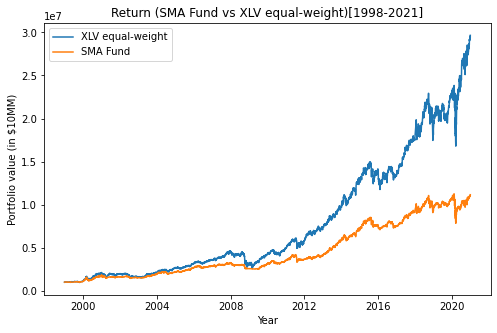

In [48]:
# full period plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $10MM)')
ax.set_xlabel('Year')
ax.plot(fund_df['date'], fund_df['curr_fund'], label='XLV equal-weight')
ax.plot(sma_fund_df['date'], sma_fund_df['curr_fund'], label='SMA Fund')
ax.legend()
ax.set_title('Return (SMA Fund vs XLV equal-weight)[1998-2021]')
plt.savefig('SMA_cont_22_Year_Return.png')

In [6]:
sma_df_pct = sma_fund_df.iloc[::252,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

In [7]:
#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
sma_df_pct = sma_df_pct - risk_free

In [8]:
mean = sma_df_pct.mean()
stdev = sma_df_pct.std()

mean,stdev

(curr_fund    0.108111
 dtype: float64,
 curr_fund    0.170119
 dtype: float64)

In [9]:
sma_sharpe = mean / stdev
sma_sharpe

curr_fund    0.635501
dtype: float64

In [65]:
sma_fund_df['num_stocks'].mean()

39.169522091974756

## Performance of Alternate SMA strategies (monthly, 2-month, 6-month)

In [10]:
# reset funds and prep
funds = 1000000
days = 21
cycle = 264
df_list = prep_all_movavg(tick_list)

In [ ]:
# monthly adjustment strategy

In [11]:
sma_1_fund_df, sma_1_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [74]:
sma_1_final_funds

34367462.31235528

In [13]:
# bimonthly adjustment strategy
funds = 1000000
days = 42
cycle = 132

In [14]:
sma_2_fund_df, sma_2_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [15]:
sma_2_fund_df

,date,curr_fund,num_stocks
0,1998-12-22,1000000,0
1,1999-02-24,1032300.594524,25
2,1999-04-26,1032256.405297,30
3,1999-06-24,1019694.733144,30
4,1999-08-24,1099370.123963,29
...,...,...,...
128,2020-05-06,44039000.19853,58
129,2020-07-07,47119565.19135,19
130,2020-09-03,48733289.044507,44
131,2020-11-03,49783611.548474,49


In [16]:
# biannual adjustment strategy
funds = 1000000
days = 126
cycle = 44

In [17]:
sma_6_fund_df, sma_6_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [71]:
# annual adjustment strategy
funds = 1000000
days = 252
cycle = 22

In [72]:
sma_12_fund_df, sma_12_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [73]:
sma_12_fund_df

,date,curr_fund,num_stocks
0,1998-12-22,1000000,0
1,1999-12-22,1075313.91935,25
2,2000-12-20,2381508.706989,20
3,2001-12-27,2555868.933842,43
4,2002-12-27,2254859.657723,36
5,2003-12-29,2988433.946133,24
6,2004-12-29,3776544.646144,48
7,2005-12-28,4704148.743022,41
8,2006-12-28,5468924.876273,34
9,2007-12-31,6507083.838803,50


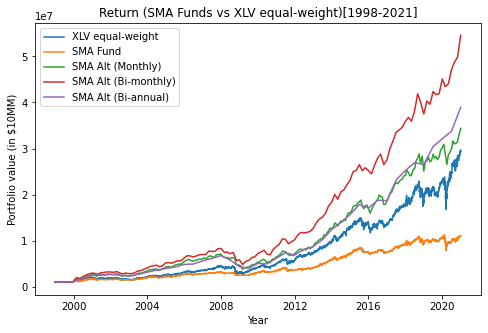

In [45]:
# full period plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $10MM)')
ax.set_xlabel('Year')
ax.plot(fund_df['date'], fund_df['curr_fund'], label='XLV equal-weight')
ax.plot(sma_fund_df['date'], sma_fund_df['curr_fund'], label='SMA Fund')
ax.plot(sma_1_fund_df['date'], sma_1_fund_df['curr_fund'], label='SMA Alt (Monthly)')
ax.plot(sma_2_fund_df['date'], sma_2_fund_df['curr_fund'], label='SMA Alt (Bi-monthly)')
ax.plot(sma_6_fund_df['date'], sma_6_fund_df['curr_fund'], label='SMA Alt (Bi-annual)')
ax.legend()
ax.set_title('Return (SMA Funds vs XLV equal-weight)[1998-2021]')
plt.savefig('SMA_all_22_Year_Return.png')

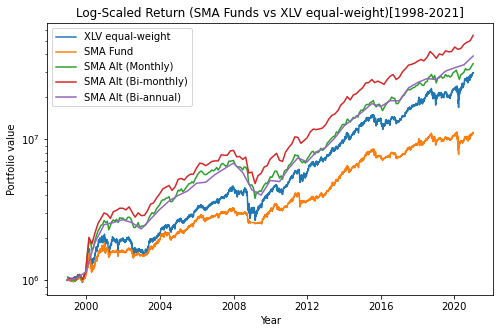

In [46]:
# log-scaled full period plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_yscale('log')
ax.set_ylabel('Portfolio value')
ax.set_xlabel('Year')
ax.plot(fund_df['date'], fund_df['curr_fund'], label='XLV equal-weight')
ax.plot(sma_fund_df['date'], sma_fund_df['curr_fund'], label='SMA Fund')
ax.plot(sma_1_fund_df['date'], sma_1_fund_df['curr_fund'], label='SMA Alt (Monthly)')
ax.plot(sma_2_fund_df['date'], sma_2_fund_df['curr_fund'], label='SMA Alt (Bi-monthly)')
ax.plot(sma_6_fund_df['date'], sma_6_fund_df['curr_fund'], label='SMA Alt (Bi-annual)')
ax.legend()
ax.set_title('Log-Scaled Return (SMA Funds vs XLV equal-weight)[1998-2021]')
plt.savefig('SMA_Log_all_22_Year_Return.png')

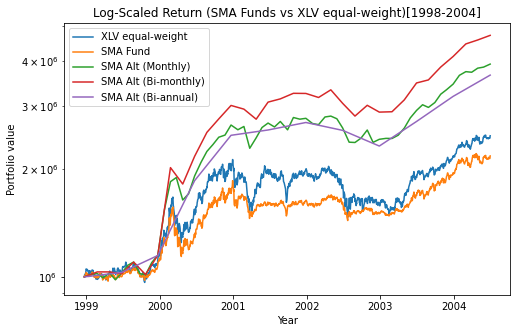

In [47]:
# full period plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_yscale('log')
ax.set_ylabel('Portfolio value')
ax.set_xlabel('Year')
ax.plot(fund_df.iloc[:1387,:]['date'], fund_df.iloc[:1387,:]['curr_fund'], label='XLV equal-weight')
ax.plot(sma_fund_df.iloc[:1387,:]['date'], sma_fund_df.iloc[:1387,:]['curr_fund'], label='SMA Fund')
ax.plot(sma_1_fund_df.iloc[:67,:]['date'], sma_1_fund_df.iloc[:67,:]['curr_fund'], label='SMA Alt (Monthly)')
ax.plot(sma_2_fund_df.iloc[:34,:]['date'], sma_2_fund_df.iloc[:34,:]['curr_fund'], label='SMA Alt (Bi-monthly)')
ax.plot(sma_6_fund_df.iloc[:12,:]['date'], sma_6_fund_df.iloc[:12,:]['curr_fund'], label='SMA Alt (Bi-annual)')
ax.legend()
ax.set_title('Log-Scaled Return (SMA Funds vs XLV equal-weight)[1998-2004]')
plt.savefig('SMA_Log_all_begin_Return.png')

### Sharpe Ratios for Alt strategies

In [25]:
#1month
sma_1_df_pct = sma_1_fund_df.iloc[::12,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
sma_1_df_pct = sma_1_df_pct - risk_free

mean = sma_1_df_pct.mean()
stdev = sma_1_df_pct.std()

mean,stdev

(curr_fund    0.183883
 dtype: float64,
 curr_fund    0.29652
 dtype: float64)

In [26]:
sma_1_sharpe = mean / stdev
sma_1_sharpe

curr_fund    0.620139
dtype: float64

In [27]:
#2month
sma_2_df_pct = sma_2_fund_df.iloc[::6,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
sma_2_df_pct = sma_2_df_pct - risk_free

mean = sma_2_df_pct.mean()
stdev = sma_2_df_pct.std()

mean,stdev

(curr_fund    0.214219
 dtype: float64,
 curr_fund    0.346596
 dtype: float64)

In [28]:
sma_2_sharpe = mean / stdev
sma_2_sharpe

curr_fund    0.618066
dtype: float64

In [29]:
#6month
sma_6_df_pct = sma_6_fund_df.iloc[::2,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
sma_6_df_pct = sma_6_df_pct - risk_free

mean = sma_6_df_pct.mean()
stdev = sma_6_df_pct.std()

mean,stdev

(curr_fund    0.187763
 dtype: float64,
 curr_fund    0.269961
 dtype: float64)

In [30]:
sma_6_sharpe = mean / stdev
sma_6_sharpe

curr_fund    0.695516
dtype: float64

In [75]:
#6month
sma_12_df_pct = sma_12_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
sma_12_df_pct = sma_12_df_pct - risk_free

mean = sma_12_df_pct.mean()
stdev = sma_12_df_pct.std()

mean,stdev

(curr_fund    0.180105
 dtype: float64,
 curr_fund    0.281475
 dtype: float64)

In [76]:
sma_12_sharpe = mean / stdev
sma_12_sharpe

curr_fund    0.639862
dtype: float64

## Relationship between number of stocks in portfolio and return

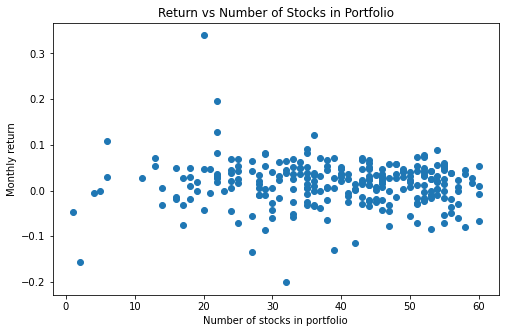

In [59]:
fig, ax = plt.subplots(figsize=(8,5))
sma_1_pct_monthly = sma_1_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()
ax.set_ylabel('Monthly return')
ax.set_xlabel('Number of stocks in portfolio')
ax.scatter(sma_1_fund_df.iloc[1:]['num_stocks'], sma_1_pct_monthly['curr_fund'])
ax.set_title('Return vs Number of Stocks in Portfolio')
plt.savefig('SMA_1_Return_vs_num_stock.png')

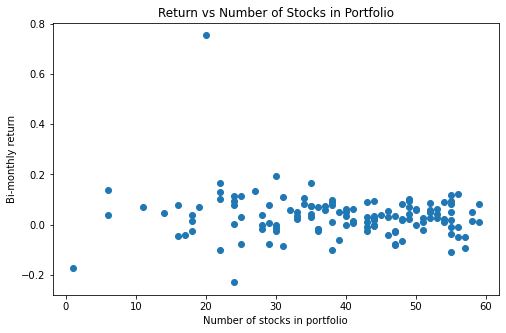

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
sma_2_pct_bimonthly = sma_2_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()
ax.set_ylabel('Bi-monthly return')
ax.set_xlabel('Number of stocks in portfolio')
ax.scatter(sma_2_fund_df.iloc[1:]['num_stocks'], sma_2_pct_bimonthly['curr_fund'])
ax.set_title('Return vs Number of Stocks in Portfolio')
plt.savefig('SMA_2_Return_vs_num_stock.png')

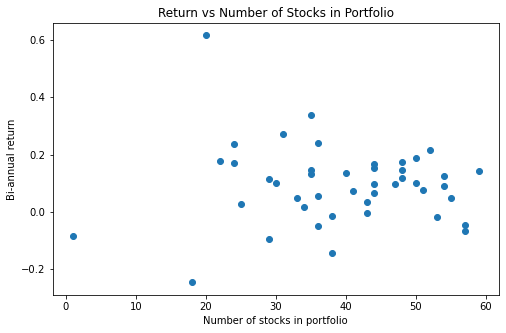

In [61]:
fig, ax = plt.subplots(figsize=(8,5))
sma_6_pct_biannual = sma_6_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()
ax.set_ylabel('Bi-annual return')
ax.set_xlabel('Number of stocks in portfolio')
ax.scatter(sma_6_fund_df.iloc[1:]['num_stocks'], sma_6_pct_biannual['curr_fund'])
ax.set_title('Return vs Number of Stocks in Portfolio')
plt.savefig('SMA_6_Return_vs_num_stock.png')